In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter("ignore")

In [2]:
df_census = pd.read_csv("Data/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/Chapter03/census_cleaned.csv")

In [3]:
X_census = df_census.iloc[:,:-1]
y_census = df_census.iloc[:,-1]

In [4]:
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [5]:
scores = cross_val_score(rf, X_census, y_census, cv=5)

In [6]:
print("Accuracy : ",np.round(scores,3))

Accuracy :  [0.851 0.844 0.851 0.852 0.851]


In [7]:
print("Mean Accuracy : {}".format(round(scores.mean(),3)))

Mean Accuracy : 0.85


In [8]:
df_bikes = pd.read_csv("Data/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/Chapter03/bike_rentals_cleaned.csv")

In [9]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [10]:
X_bikes = df_bikes.iloc[:,:-1]
y_bikes = df_bikes.iloc[:,-1]

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
rf = RandomForestRegressor(n_estimators= 10, random_state=2, n_jobs=-1)

In [13]:
scores = cross_val_score(rf, X_bikes, y_bikes, scoring="neg_mean_squared_error", cv = 10)

In [14]:
rmse = np.sqrt(-scores)

In [15]:
print("RMSE : ",np.round(rmse, 3))

RMSE :  [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]


In [16]:
print("Mean RMSE : {}".format(round(rmse.mean(),3)))

Mean RMSE : 945.365


In [17]:
rf = RandomForestClassifier(n_estimators=10,oob_score=True,n_jobs=-1, random_state=2)

In [18]:
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [19]:
rf.oob_score_

0.8343109855348423

In [20]:
rf = RandomForestClassifier(n_estimators=50,oob_score=True,n_jobs=-1, random_state=2)

In [21]:
rf.fit(X_census, y_census)
rf.oob_score_

0.8518780135745216

In [22]:
rf = RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=-1, random_state=2)
rf.fit(X_census, y_census)
rf.oob_score_

0.8551334418476091

In [24]:
import matplotlib.pyplot as plt

In [25]:
oob_score = []

In [26]:
rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)

In [27]:
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=2, warm_start=True)

In [28]:
oob_score.append(rf.oob_score_)

In [29]:
est = 50
estimators = [est]

In [30]:
for i in range(9):
    est += 50
    estimators.append(est)
    rf.set_params(n_estimators = est)
    rf.fit(X_census, y_census)
    oob_score.append(rf.oob_score_)

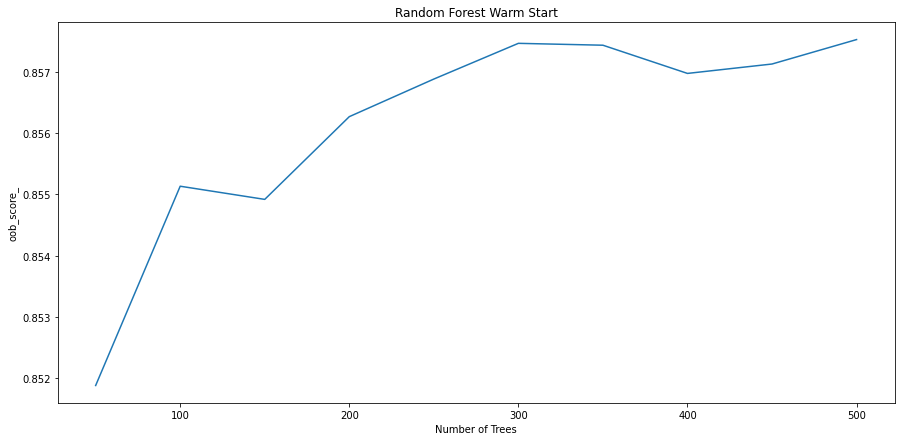

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(estimators, oob_score)
plt.xlabel("Number of Trees")
plt.ylabel("oob_score_")
plt.title("Random Forest Warm Start")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [34]:
rf = RandomForestRegressor(n_estimators= 50, warm_start=True, n_jobs= -1, random_state= 2)

In [35]:
scores = cross_val_score(rf, X_bikes, y_bikes, scoring= "neg_mean_squared_error", cv=10)

In [36]:
rmse = np.sqrt(-scores)

In [37]:
print("RMSE : ", np.round(rmse, 3))

RMSE :  [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]


In [38]:
print("Mean RMSE : {}".format(round(rmse.mean(),3)))

Mean RMSE : 902.398


In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
def randomized_search_reg(params, runs = 16, reg = RandomForestRegressor(random_state=2, n_jobs=-1)):
    rand_reg = RandomizedSearchCV(reg, params, n_iter = runs, scoring = "neg_mean_squared_error",
                                    cv = 10, n_jobs=-1, random_state=2)
    rand_reg.fit(X_train, y_train)
    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_
    print("Best Params : ", best_params)
    best_score = np.sqrt(-rand_reg.best_score_)
    print("Training Score : {:.2f}".format(best_score))
    y_pred = best_model.predict(X_test)
    from sklearn.metrics import mean_squared_error as mse
    rmse_test = mse(y_test, y_pred)**0.5
    print("Test Set Score : {:.2f}".format(rmse_test))

In [43]:
randomized_search_reg(params={'min_weight_fraction_leaf':[0.0,0.0025,0.005,0.0075,0.01,0.05],
                             'min_samples_split':[2,0.01,0.02,0.03,0.04,0.06,0.08,0.1],
                             'min_samples_leaf':[1,2,4,6,8,10,20,30],
                             'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.2],
                             'max_leaf_nodes':[10,15,20,25,30,35,40,45,50,None],
                             'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
                             'max_depth':[None,2,4,6,8,10,20]})

Best Params :  {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
Training Score : 759.08
Test Set Score : 701.80


In [44]:
randomized_search_reg(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                             'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.2],
                             'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
                             'max_depth':[None,2,4,6,8,10,20]})

Best Params :  {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 10}
Training Score : 679.05
Test Set Score : 626.54


In [45]:
randomized_search_reg(params={'min_samples_leaf':[1,2,4,6,8,10,20,30],
                             'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.2],
                             'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
                             'max_depth':[None,2,4,6,8,10,20]},runs=20)

Best Params :  {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 10}
Training Score : 679.05
Test Set Score : 626.54


In [46]:
randomized_search_reg(params={'min_samples_leaf':[1,2,3,4,5,6],
                             'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.08],
                             'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
                             'max_depth':[None,8,10,12,14,16,18,20]})

Best Params :  {'min_samples_leaf': 1, 'min_impurity_decrease': 0.15, 'max_features': 0.7, 'max_depth': 20}
Training Score : 678.87
Test Set Score : 631.26


In [47]:
randomized_search_reg(params={'min_samples_leaf':[1,2,3,4,5,6],
                             'min_impurity_decrease':[0.0,0.01,0.05,0.10,0.15,0.08],
                             'max_features':['auto',0.8,0.7,0.6,0.5,0.4],
                             'max_depth':[None,8,10,12,14,16,18,20],
                             'n_estimators':[100]}, runs=20)

Best Params :  {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.5, 'max_depth': 12}
Training Score : 674.40
Test Set Score : 615.15


In [48]:
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, max_features=0.6, 
                          max_depth=12, warm_start=True, n_jobs=-1, random_state=2)

In [49]:
scores = cross_val_score(rf, X_bikes, y_bikes, scoring="neg_mean_squared_error", cv=10)

In [50]:
rmse = np.sqrt(-scores)

In [51]:
print("RMSE : ",np.round(rmse, 3))

RMSE :  [ 818.354  514.173  547.392  814.059  769.54   730.025  831.376  794.634
  756.83  1595.237]


In [52]:
print("Mean RMSE : {:.3f}".format(rmse.mean()))

Mean RMSE : 817.162


In [53]:
from sklearn.utils import shuffle

In [54]:
df_shuffl_bikes = shuffle(df_bikes, random_state=2)

In [55]:
X_shuffle_bikes = df_shuffl_bikes.iloc[:,:-1]
y_shuffle_bikes = df_shuffl_bikes.iloc[:,-1]

In [56]:
rf = RandomForestRegressor(n_estimators= 100, min_impurity_decrease=0.1, max_features=0.6, max_depth=12,
                          n_jobs=-1, random_state=2)

In [57]:
scores = cross_val_score(rf, X_shuffle_bikes, y_shuffle_bikes, scoring="neg_mean_squared_error", cv=10)

In [58]:
rmse = np.sqrt(-scores)

In [59]:
print("RMSE : ",np.round(rmse,3))

RMSE :  [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]


In [60]:
print("Mean RMSE : {:.3f}".format(rmse.mean()))

Mean RMSE : 645.329
